In [1]:
import numpy as np
import os

DATA_PATH = '../data/processed'

## Loading and splitting data

In [2]:
def load_processed_data(year, img_h=1400, img_w=1400):
    
    X = []
    y = []

    data_dir = os.path.join(DATA_PATH, str(year))
    frames_dir = os.path.join(data_dir, 'frames')
    masks_dir = os.path.join(data_dir, 'masks')
    
    for file in sorted(os.listdir(frames_dir)):   
        if file.startswith('R'):
            filename = file.split('.')[0]

            frame = np.load(os.path.join(frames_dir, filename + '.npy'))
            mask = np.load(os.path.join(masks_dir, filename + '_labels.npy'))
            X.append(frame[:img_h, :img_w, :])
            y.append(mask[:img_h, :img_w])

    X = np.array(X)
    y = np.array(y)

    return X, y

In [3]:
def reshape_data(X, y):
    
    X_reshaped = X.reshape(-1, X.shape[-1])
    y_reshaped = y.reshape(-1)

    return X_reshaped, y_reshaped

## Train-test Split

In [4]:
from sklearn.model_selection import train_test_split

X, y = load_processed_data(2017)
X, y = reshape_data(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

## Building Logistic Regression Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression

def standardizer(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

log_reg_pipeline = Pipeline([
    ('standarize', FunctionTransformer(standardizer, validate=False)),
    ('log_reg', LogisticRegression(solver='lbfgs', max_iter=300))])

## Training and validating on 2017 data

In [6]:
log_reg_pipeline.fit(X_train, y_train)

KeyboardInterrupt: 

In [149]:
y_pred = log_reg_pipeline.predict(X_val)

## Validation results

In [150]:
# Intersection-over-union
# Common metric for image segmentation problems

def iou(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    iou = tp / (tp + fn + fp)
    return iou

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

val_confusion_matrix = confusion_matrix(y_val, y_pred)

print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Intersection-over-Union: %.2f' % iou(val_confusion_matrix))
print('Confusion Matrix: \n', val_confusion_matrix)
print('Classification report:\n', classification_report(y_val, y_pred))

Accuracy: 0.92
Intersection-over-Union: 0.77
Confusion Matrix: 
 [[7798098  323054]
 [ 580172 3058676]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95   8121152
           1       0.90      0.84      0.87   3638848

    accuracy                           0.92  11760000
   macro avg       0.92      0.90      0.91  11760000
weighted avg       0.92      0.92      0.92  11760000



## Testing on unseen 2018 data

In [152]:
X_2018, y_2018 = load_processed_data(2018)
X_2018_reshaped, y_2018_reshaped = reshape_data(X_2018, y_2018)

In [153]:
y_2018_pred = log_reg_pipeline.predict(X_2018_reshaped)

In [154]:
confusion_mat = confusion_matrix(y_2018_reshaped, y_2018_pred)

print('Accuracy: %.2f' % accuracy_score(y_2018_reshaped, y_2018_pred))
print('Intersection-over-Union: %.2f' % iou(confusion_mat))
print('Confusion Matrix: \n', confusion_mat)
print('Classification report:\n', classification_report(y_2018_reshaped, y_2018_pred))

Accuracy: 0.91
Intersection-over-Union: 0.72
Confusion Matrix: 
 [[29965355  2062366]
 [ 2153833 10898446]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93  32027721
           1       0.84      0.83      0.84  13052279

    accuracy                           0.91  45080000
   macro avg       0.89      0.89      0.89  45080000
weighted avg       0.91      0.91      0.91  45080000



## Plotting predicted and truth labels

In [ ]:
y_2018_pred = y_2018_pred.reshape(y_2018.shape[0], y_2018.shape[1], (y_2018.shape[2])

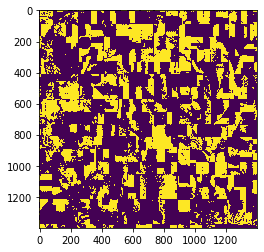

In [146]:
import matplotlib.pyplot as plt
plt.imshow(y_2018_pred.reshape(23, 1400, 1400)[1])

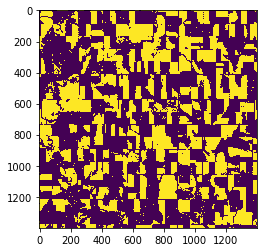

In [147]:
plt.imshow(y_2018[1])